# What is Time Series Forecasting?
### Time series forecasting occurs when you make scientific predictions based on historical time stamped data using statistics and modelling

### 1) EDA - Plots, Visualizations, Summaries and finding relations between features
### 2) Data Engineering
### 3) Model Building
### 4) Model Validation



In [71]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import ccf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import VAR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.stattools import grangercausalitytests


#### 1) Univariate - one feature/variable
#### 2) Multivariate - more than one feature/variable

In [72]:
#google = pd.read_csv('Data/GOOGL_2006-01-01_to_2018-01-01.csv')
#df = google['High']
#df

In [73]:
#plt.figure(figsize=(16,5))
#df.plot()

In [74]:
df = pd.read_csv('Data/AirQuality.csv',sep = ';',decimal=',')
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
df = df.drop(['Unnamed: 15','Unnamed: 16'],axis = 1)
# removing these 2 columns because they are completely null

In [77]:
null_data = df[df.isnull().any(axis = 1)]
null_data
#checking for rows/columns containing null values

In [78]:
df.dropna(inplace = True)
df.describe()
#removing null values 

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


### from above table it is observed that all min values are -200. So it must be used to replace null values. We remove or impute those

In [79]:
df = df.replace(-200,np.nan)
#df.info()

In [80]:
df.loc[:,'Datetime'] = df['Date'] + ' ' + df['Time']
from datetime import datetime
DateTime = []
for x in df['Datetime']:
    DateTime.append(datetime.strptime(x,'%d/%m/%Y %H.%M.%S'))
datetime = pd.Series(DateTime)
df.index = datetime
df = df.drop(['Date','Time'],axis = 1)
df = df.drop(['Datetime'],axis = 1)
#making data and time into one column

In [81]:
df = df.drop(['NMHC(GT)'],axis =1)#because it has many null values
for c in df.columns:
    df = df.fillna(df[c].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   C6H6(GT)       9357 non-null   float64
 3   PT08.S2(NMHC)  9357 non-null   float64
 4   NOx(GT)        9357 non-null   float64
 5   PT08.S3(NOx)   9357 non-null   float64
 6   NO2(GT)        9357 non-null   float64
 7   PT08.S4(NO2)   9357 non-null   float64
 8   PT08.S5(O3)    9357 non-null   float64
 9   T              9357 non-null   float64
 10  RH             9357 non-null   float64
 11  AH             9357 non-null   float64
dtypes: float64(12)
memory usage: 950.3 KB


In [82]:
adfuller(df['CO(GT)'])

(-11.050662112980005,
 5.089829692842113e-20,
 36,
 9320,
 {'1%': -3.431051834977192,
  '5%': -2.8618501668189706,
  '10%': -2.5669350967161857},
 18988.55969088252)

<AxesSubplot:>

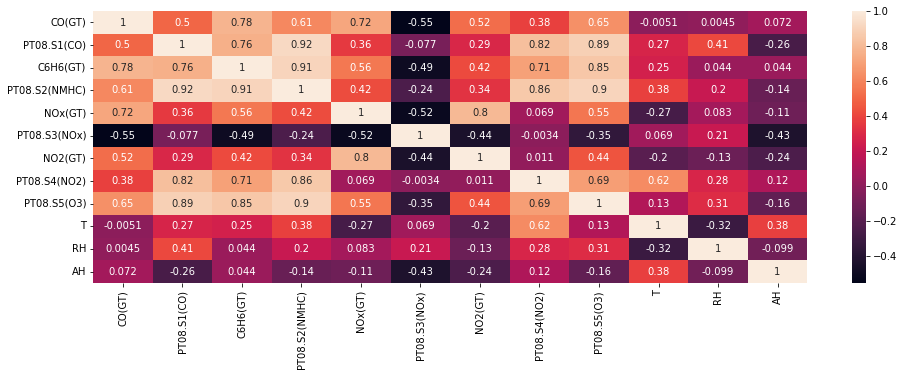

In [89]:
plt.figure(figsize=(16,5))
sns.heatmap(df.corr(),annot=True)
#gives correlation between features

### If more than one feature strongly influence our output, then we can use linear regression to predict those values. We can forecast the respective features and use them to reg fit and predict the values.

In [20]:
regr = LinearRegression()
x_train = df.iloc[0:6000,[0,2]]
y_train = df.iloc[0:6000,[1]]
x_test = df.iloc[6000:,[0,2]]
y_test = df.iloc[6000:,[1]]



In [21]:
regr.fit(x_train,y_train) # predicting y using x by linear regression


LinearRegression()

In [22]:
regr.intercept_

array([771.87838677])

In [23]:
regr.coef_

array([[-9.09381093, 30.10439127]])

In [24]:
from pmdarima import auto_arima

In [25]:
m11 = auto_arima(df['CO(GT)'][0:6000])
m11 

ARIMA(order=(0, 1, 5), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [26]:
m11 = ARIMA(df['CO(GT)'][0:6000],order = (0,1,5))
m1 = m11.fit()
m1.summary()

C:\Users\dreddy86\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\dreddy86\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\dreddy86\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 CO(GT)   No. Observations:                 6000
Model:                 ARIMA(0, 1, 5)   Log Likelihood               -6474.320
Date:                Fri, 14 Oct 2022   AIC                          12960.640
Time:                        15:20:43   BIC                          13000.837
Sample:                    03-10-2004   HQIC                         12974.599
                         - 11-15-2004                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0595      0.008     -7.326      0.000      -0.075      -0.044
ma.L2         -0.3070      0.009    -32.650      0.000      -0.325      -0.289
ma.L3         -0.2920      0.010    -29.197      0.000      -0.312      -0.272
ma.L4         -0.1885      0.010    -18.352      0.000      -0.209      -0.168
ma.L5         -0.0845      0.012     -7.062      0.000      -0.108      -0.061
sigma2         0.5067      0.005    104.470      0.000       0.497       0.516
===================================================================================
Ljung-Box (L1) (Q):                   0.35   Jarque-Bera (JB):              7968.86
Prob(Q):                              0.56   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                             0.85
Prob(H) (two-sided):                  0.05   Kurtosis:                         8.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
m1.forecast(10)

2004-11-15 18:00:00    2.464528
2004-11-15 19:00:00    2.110152
2004-11-15 20:00:00    1.791682
2004-11-15 21:00:00    1.596468
2004-11-15 22:00:00    1.513062
2004-11-15 23:00:00    1.513062
2004-11-16 00:00:00    1.513062
2004-11-16 01:00:00    1.513062
2004-11-16 02:00:00    1.513062
2004-11-16 03:00:00    1.513062
Freq: H, Name: predicted_mean, dtype: float64

In [28]:
m21 = auto_arima(df['C6H6(GT)'][0:6000])
m21

ARIMA(order=(3, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [29]:
m21 = ARIMA(df['C6H6(GT)'][0:6000],order = (3,1,2))
m2 = m21.fit()
m2.summary()

C:\Users\dreddy86\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\dreddy86\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\dreddy86\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               C6H6(GT)   No. Observations:                 6000
Model:                 ARIMA(3, 1, 2)   Log Likelihood              -16822.054
Date:                Fri, 14 Oct 2022   AIC                          33656.109
Time:                        15:21:59   BIC                          33696.305
Sample:                    03-10-2004   HQIC                         33670.068
                         - 11-15-2004                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2305      0.091      2.521      0.012       0.051       0.410
ar.L2          0.5306      0.099      5.370      0.000       0.337       0.724
ar.L3         -0.2351      0.036     -6.462      0.000      -0.306      -0.164
ma.L1         -0.1567      0.090     -1.732      0.083      -0.334       0.021
ma.L2         -0.8128      0.089     -9.179      0.000      -0.986      -0.639
sigma2        15.9600      0.149    106.888      0.000      15.667      16.253
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             13497.06
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.19   Skew:                             0.91
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
m2.forecast(10)

2004-11-15 18:00:00    11.347165
2004-11-15 19:00:00     9.974973
2004-11-15 20:00:00     8.707713
2004-11-15 21:00:00     7.723563
2004-11-15 22:00:00     7.147025
2004-11-15 23:00:00     6.789961
2004-11-16 00:00:00     6.633176
2004-11-16 01:00:00     6.543153
2004-11-16 02:00:00     6.523175
2004-11-16 03:00:00     6.507672
Freq: H, Name: predicted_mean, dtype: float64

In [31]:
y = regr.intercept_[0] +regr.coef_[0][0]*m1.forecast(10)+regr.coef_[0][1]*m2.forecast(10)
y

2004-11-15 18:00:00    1091.065946
2004-11-15 19:00:00    1052.979558
2004-11-15 20:00:00    1017.725565
2004-11-15 21:00:00     989.873569
2004-11-15 22:00:00     973.275738
2004-11-15 23:00:00     962.526533
2004-11-16 00:00:00     957.806614
2004-11-16 01:00:00     955.096536
2004-11-16 02:00:00     954.495109
2004-11-16 03:00:00     954.028378
Freq: H, Name: predicted_mean, dtype: float64

In [32]:
y_test.head(10)

,PT08.S1(CO)
2004-11-15 18:00:00,1025.0
2004-11-15 19:00:00,1029.0
2004-11-15 20:00:00,1038.0
2004-11-15 21:00:00,904.0
2004-11-15 22:00:00,844.0
2004-11-15 23:00:00,839.0
2004-11-16 00:00:00,844.0
2004-11-16 01:00:00,800.0
2004-11-16 02:00:00,786.0
2004-11-16 03:00:00,737.0


In [33]:
m31 = auto_arima(df['PT08.S1(CO)'][0:6000])
m31

ARIMA(order=(4, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [34]:
m31 = ARIMA(df['PT08.S1(CO)'][0:6000],order = (4,1,2))
m3 = m31.fit()
m3.summary()

C:\Users\dreddy86\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\dreddy86\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\dreddy86\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            PT08.S1(CO)   No. Observations:                 6000
Model:                 ARIMA(4, 1, 2)   Log Likelihood              -37147.337
Date:                Fri, 14 Oct 2022   AIC                          74308.673
Time:                        15:23:52   BIC                          74355.569
Sample:                    03-10-2004   HQIC                         74324.959
                         - 11-15-2004                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1888      0.077      2.447      0.014       0.038       0.340
ar.L2          0.6298      0.080      7.903      0.000       0.474       0.786
ar.L3         -0.1850      0.020     -9.130      0.000      -0.225      -0.145
ar.L4         -0.0709      0.011     -6.210      0.000      -0.093      -0.049
ma.L1         -0.1306      0.078     -1.669      0.095      -0.284       0.023
ma.L2         -0.7719      0.073    -10.538      0.000      -0.916      -0.628
sigma2        1.4e+04     89.217    156.881      0.000    1.38e+04    1.42e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            226385.45
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                             0.14
Prob(H) (two-sided):                  0.06   Kurtosis:                        33.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
m3.forecast(10)

2004-11-15 18:00:00    920.201673
2004-11-15 19:00:00    901.515050
2004-11-15 20:00:00    881.732650
2004-11-15 21:00:00    865.391177
2004-11-15 22:00:00    854.069050
2004-11-15 23:00:00    846.623433
2004-11-16 00:00:00    842.512005
2004-11-16 01:00:00    840.299151
2004-11-16 02:00:00    839.471755
2004-11-16 03:00:00    839.210155
Freq: H, Name: predicted_mean, dtype: float64

In [37]:
#scaled_data = StandardScaler().fit_transform(X = df['CO(GT)'].values.reshape(-1,1))
df['CO(GT)_s'] = (df['CO(GT)']-np.mean(df['CO(GT)']))/(np.var(df['CO(GT)']))**1/2
df['C6H6(GT)_s']= (df['C6H6(GT)']-np.mean(df['C6H6(GT)']))/(np.var(df['C6H6(GT)']))**1/2
df['PT08.S1(CO)_s'] = (df['PT08.S1(CO)']-np.mean(df['PT08.S1(CO)']))/(np.var(df['PT08.S1(CO)']))**1/2

In [40]:
m51 = auto_arima(df['C6H6(GT)_s'][0:6000])
m51


ARIMA(order=(3, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [41]:
m51 = ARIMA(df['C6H6(GT)_s'][0:6000],order = (3,1,2))
m5 = m51.fit()
m5.summary()

C:\Users\dreddy86\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\dreddy86\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\dreddy86\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             C6H6(GT)_s   No. Observations:                 6000
Model:                 ARIMA(3, 1, 2)   Log Likelihood               11450.299
Date:                Fri, 14 Oct 2022   AIC                         -22888.598
Time:                        15:25:58   BIC                         -22848.402
Sample:                    03-10-2004   HQIC                        -22874.639
                         - 11-15-2004                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1885      0.076      2.492      0.013       0.040       0.337
ar.L2          0.5739      0.082      6.972      0.000       0.413       0.735
ar.L3         -0.2515      0.032     -7.890      0.000      -0.314      -0.189
ma.L1         -0.1156      0.075     -1.547      0.122      -0.262       0.031
ma.L2         -0.8505      0.073    -11.655      0.000      -0.994      -0.707
sigma2         0.0013    1.2e-05    106.810      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             13409.83
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.19   Skew:                             0.91
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
m41 = auto_arima(df['CO(GT)_s'][0:6000])
m41

ARIMA(order=(3, 1, 4), scoring_args={}, suppress_warnings=True)

In [43]:
m41 = ARIMA(df['CO(GT)_s'][0:6000],order = (2,1,2))
m4 = m41.fit()
m4.summary()

C:\Users\dreddy86\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\dreddy86\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\dreddy86\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               CO(GT)_s   No. Observations:                 6000
Model:                 ARIMA(2, 1, 2)   Log Likelihood                1013.399
Date:                Fri, 14 Oct 2022   AIC                          -2016.799
Time:                        15:28:09   BIC                          -1983.302
Sample:                    03-10-2004   HQIC                         -2005.166
                         - 11-15-2004                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8640      0.049     17.622      0.000       0.768       0.960
ar.L2         -0.1648      0.039     -4.179      0.000      -0.242      -0.087
ma.L1         -0.9242      0.051    -18.256      0.000      -1.023      -0.825
ma.L2         -0.0684      0.051     -1.353      0.176      -0.167       0.031
sigma2         0.0417      0.000    105.455      0.000       0.041       0.043
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              8549.94
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                             0.90
Prob(H) (two-sided):                  0.02   Kurtosis:                         8.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [93]:
#df

In [45]:
x_train_s = df.iloc[0:6000,[-2,-3]]
y_train_s = df.iloc[0:6000,[-1]]
x_test_s = df.iloc[6000:,[-2,-3]]
y_test_s = df.iloc[6000:,[-1]]
regr_s = LinearRegression()
regr_s.fit(x_train_s,y_train_s)

LinearRegression()

In [46]:
y_s = regr_s.intercept_[0] +regr_s.coef_[0][0]*m4.forecast(10)+regr_s.coef_[0][1]*m5.forecast(10)
y_s

2004-11-15 18:00:00    0.002433
2004-11-15 19:00:00    0.001430
2004-11-15 20:00:00    0.000546
2004-11-15 21:00:00   -0.000052
2004-11-15 22:00:00   -0.000423
2004-11-15 23:00:00   -0.000645
2004-11-16 00:00:00   -0.000776
2004-11-16 01:00:00   -0.000853
2004-11-16 02:00:00   -0.000897
2004-11-16 03:00:00   -0.000923
Freq: H, Name: predicted_mean, dtype: float64

In [47]:
y_test_s.head(10)

,PT08.S1(CO)_s
2004-11-15 18:00:00,-0.000176
2004-11-15 19:00:00,-0.000154
2004-11-15 20:00:00,-0.000104
2004-11-15 21:00:00,-0.000844
2004-11-15 22:00:00,-0.001175
2004-11-15 23:00:00,-0.001203
2004-11-16 00:00:00,-0.001175
2004-11-16 01:00:00,-0.001418
2004-11-16 02:00:00,-0.001496
2004-11-16 03:00:00,-0.001766


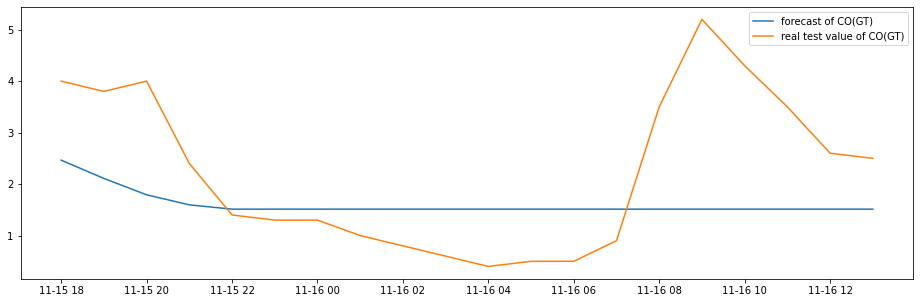

In [57]:
plt.figure(figsize=(16,5))
plt.plot(m1.forecast(20),label = 'forecast of CO(GT)')
#plt.legend('forecast of CO(GT)')
plt.plot(x_test['CO(GT)'][0:20],label = 'real test value of CO(GT)')
plt.legend()
#plt.legend('Real CO(GT) test values')

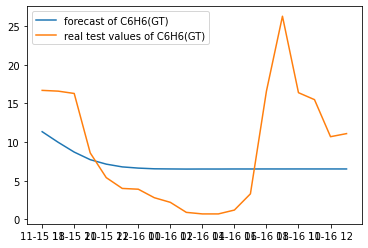

In [59]:
plt.plot(m2.forecast(20),label = 'forecast of C6H6(GT)')
plt.plot(x_test['C6H6(GT)'][0:20],label = 'real test values of C6H6(GT)')
plt.legend()

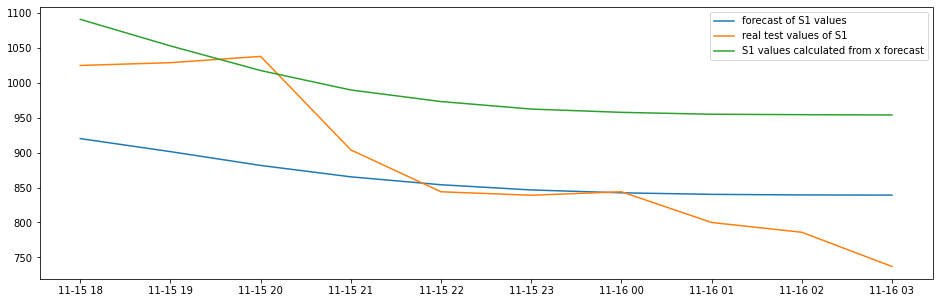

In [62]:
plt.figure(figsize=(16,5))
plt.plot(m3.forecast(10),label = 'forecast of S1 values')
plt.plot(y_test[0:10],label = 'real test values of S1')
plt.plot(y,label = 'S1 values calculated from x forecast')
plt.legend()

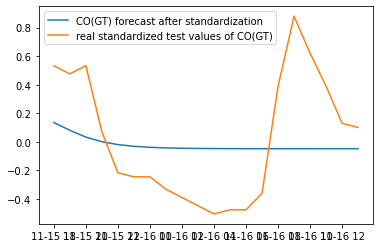

In [64]:
plt.plot(m4.forecast(20),label = 'CO(GT) forecast after standardization')
plt.plot(x_test_s['CO(GT)_s'][0:20], label = 'real standardized test values of CO(GT)')
plt.legend()

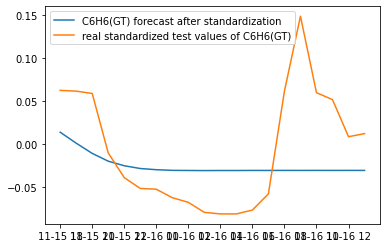

In [65]:
plt.plot(m5.forecast(20),label = 'C6H6(GT) forecast after standardization')
plt.plot(x_test_s['C6H6(GT)_s'][0:20],label = 'real standardized test values of C6H6(GT)')
plt.legend()

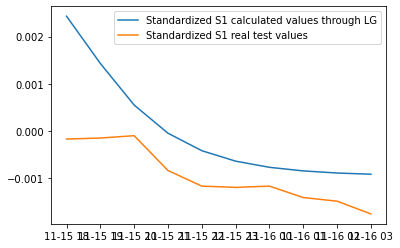

In [66]:
plt.plot(y_s[0:10],label = 'Standardized S1 calculated values through LG')
plt.plot(y_test_s[0:10], label = 'Standardized S1 real test values')
plt.legend()

### Standardization is used to scale down the data because the data follows normal distributions (similar). But by observing the outputs, we got better predicts by using the original data itself. 